In [3]:
import csv
import pandas
from sklearn.datasets import load_diabetes


In [9]:
diabetes = load_diabetes()
print (diabetes.keys())
data = diabetes.data #real -0.2<x<0.2
target = diabetes.target #integer 25<y<346
print (data.shape)
print (target.shape)
print (data[:5])
print (target[:5])
data

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
import numpy as np
#use only one feature
X = data[:,:1]
y = target
#X_train = np.array([[0], [1], [2]])
#X_test = np.array([[3], [4], [6]])
#y_train = np.array([0,1,2]).reshape(-1,1)
#y_test = np.array([3,4,5]).reshape(-1,1)
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20].reshape((-1,1))
y_test = y[-20:].reshape((-1,1))
print ('X_train=',X_train.shape)
print ('X_test=',X_test.shape)
print ('y_train=',y_train.shape)
print ('y_test=',y_test.shape)

X_train= (422, 1)
X_test= (20, 1)
y_train= (422, 1)
y_test= (20, 1)


In [6]:

class linear(object):
    def __init__(self):
        self.W = None
        self.b = None

    def loss(self,X,y):
        num_feature  = X.shape[1]
        num_train = X.shape[0]

        h = X.dot(self.W) + self.b
        loss = 0.5 *np.sum(np.square(h - y)) / num_train

        dW = X.T.dot((h-y)) / num_train
        db = np.sum((h-y)) / num_train

        return loss,dW,db

    def train(self,X,y,learn_rate = 0.001,iters = 10000):
        num_feature = X.shape[1]
        self.W = np.zeros((num_feature,1))
        self.b = 0
        loss_list = []

        for i in range(iters):
            loss,dW,db = self.loss(X,y)
            loss_list.append(loss)
            self.W += -learn_rate*dW
            self.b += -learn_rate*db

            if i%500 == 0:
                print ('iters = %d,loss = %f' % (i,loss))
        return loss_list

    def predict(self,X_test):
        y_pred = X.dot(self.W) + self.b
        return y_pred

    pass

In [7]:
classify = linear()
print ('start')
loss_list = classify.train(X_train,y_train)
print ('end')

print (classify.W,classify.b)

start
iters = 0,loss = 14734.323460
iters = 500,loss = 7298.125639
iters = 1000,loss = 4563.715670
iters = 1500,loss = 3558.131670
iters = 2000,loss = 3188.229325
iters = 2500,loss = 3052.064529
iters = 3000,loss = 3001.844299
iters = 3500,loss = 2983.225837
iters = 4000,loss = 2976.227547
iters = 4500,loss = 2973.502288
iters = 5000,loss = 2972.348550
iters = 5500,loss = 2971.772999
iters = 6000,loss = 2971.410390
iters = 6500,loss = 2971.126423
iters = 7000,loss = 2970.871717
iters = 7500,loss = 2970.628112
iters = 8000,loss = 2970.388932
iters = 8500,loss = 2970.151720
iters = 9000,loss = 2969.915572
iters = 9500,loss = 2969.680155
end
[[6.98720088]] 153.35317105469645


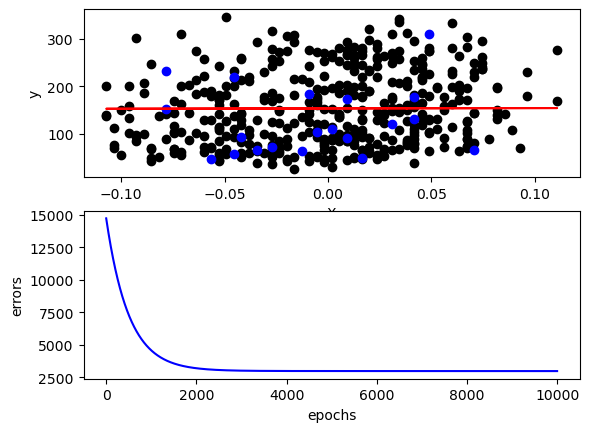

In [8]:
import matplotlib.pyplot as plt
f = X_train.dot(classify.W) + classify.b
fig = plt.figure()
plt.subplot(211)
plt.scatter(X_train,y_train,color = 'black')
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_train,f,color = 'red')
plt.xlabel('X')
plt.ylabel('y')

plt.subplot(212)
plt.plot(loss_list,color = 'blue')
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()